In [88]:
import matplotlib.pyplot as plt
import numpy as np

## 表2-1与表2-2 

In [89]:
t_1 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90] # s
u_c_charge_1 = [0.002, 3.120, 4.96, 6.22, 7.25, 8.11, 8.64, 8.97, 9.27, 9.59, 9.77, 9.87, 9.91, 9.95] # V
u_c_release_1 = [9.96, 7.02, 5.07, 3.94, 2.652, 1.851, 1.296, 0.947, 0.693, 0.386, 0.205, 0.113, 0.066, 0.039] # V

t_2 = [0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100, 120, 150, 180] # s
u_c_charge_2 = [0.002, 1.603, 2.691, 3.749, 4.55, 5.31, 5.94, 7.01, 8.33, 9.07, 9.45, 9.68, 9.84, 9.91] # V
u_c_release_2 = [9.91, 8.52, 7.22, 6.34, 5.37, 4.68, 3.97, 2.877, 1.546, 0.887, 0.503, 0.283, 0.125, 0.059] # V

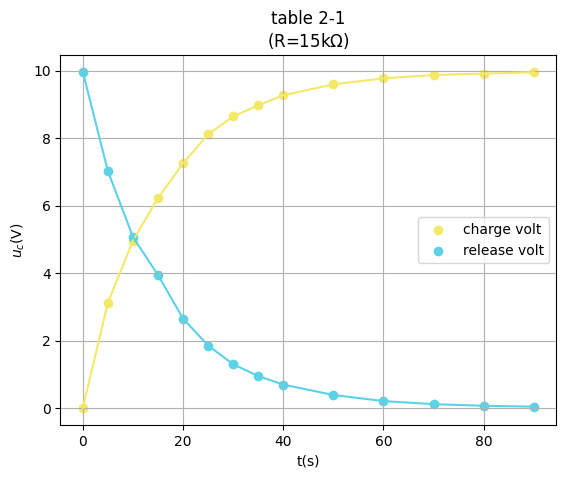

In [90]:
plt.plot(t_1, u_c_charge_1, c='#F4E869')
plt.scatter(t_1, u_c_charge_1, c='#F4E869', label='charge volt')
plt.plot(t_1, u_c_release_1, c='#5CD2E6')
plt.scatter(t_1, u_c_release_1, c='#5CD2E6', label='release volt')
plt.xlabel('t(s)')
plt.ylabel('$u_{c}$(V)')
plt.grid(True)
plt.title('table 2-1\n(R=15k$\Omega$)')
plt.legend()
plt.show()

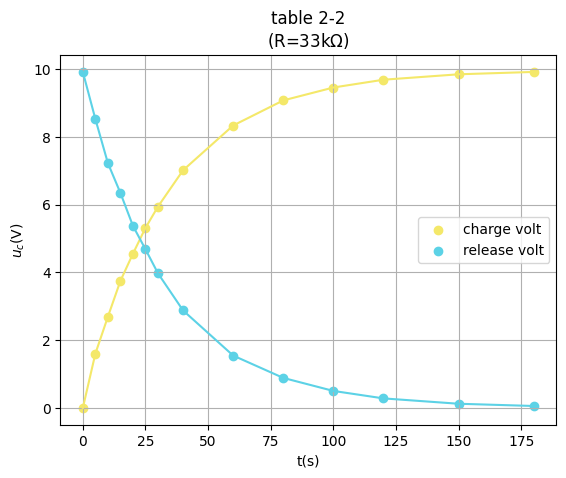

In [91]:
plt.plot(t_2, u_c_charge_2, c='#F4E869')
plt.scatter(t_2, u_c_charge_2, c='#F4E869', label='charge volt')
plt.plot(t_2, u_c_release_2, c='#5CD2E6')
plt.scatter(t_2, u_c_release_2, c='#5CD2E6', label='release volt')
plt.xlabel('t(s)')
plt.ylabel('$u_{c}$(V)')
plt.grid(True)
plt.title('table 2-2\n(R=33k$\Omega$)')
plt.legend()
plt.show()

## 图4-1和图4-2

In [240]:
T = [] # s
y_square = [] # V
x_u_c = np.linspace(0, 3, num=50000) # s
y_u_c = [] # V

def generate_square_wave(frequency:int, y_max:float, y_min:float, ratio:float):
    period = 1/frequency
    time_min = 0
    time_max = 0
    for time in range(1, 6):
        time_min = time_max+period*ratio
        time_max = time*period
        T.append(time_min)
        y_square.append(y_min)
        T.append(time_max)
        y_square.append(y_max)

def get_period(u_s:float, u_max:float,R:int, C:int):
    count = 0
    for x in x_u_c:
        u = u_s*(1-np.exp(-x/(R*C/1000000)))
        if u<u_max:
            count += 1
        else:
            print(count)
            return count

def generate_u_c(u_s:float, u_c:float, R:int, C:int):
    period = 2*get_period(u_s=u_s, u_max=u_c, R=R, C=C)
    print(period)

    is_first = True
    u_last = 0
    for i in range(0, len(x_u_c)):

        if i%period < period/2:
            if is_first == True:
                u_1 = u_s*(1-np.exp(-x_u_c[i%period]/(R*C/1000000)))
            else:
                u_1 = u_s*(1-np.exp(-x_u_c[i%period]/(R*C/1000000)))
            y_u_c.append(u_1)
        else:
            is_first = False
            u_2 = u_c*np.exp(-x_u_c[int(i%period-period/2)]/(R*C/1000000))
            u_last = u_2
            y_u_c.append(u_2)

10439
20878
[0.0, 0.0001646994879475727, 0.00032937960023704527, 0.0004940403391478166, 0.0006586817069589745, 0.0008233037059494518, 0.0009879063383978703, 0.0011524896065825407, 0.001317053512781463, 0.0014815980592724819, 0.0016461232483331312, 0.0018106290822406334, 0.001975115563272056, 0.0021395826937038454, 0.0023040304758129124, 0.0024684589118749265, 0.002632868004166178, 0.0027972577549623344, 0.0029616281665384436, 0.003125979241170018, 0.003290310981131639, 0.003454623388697886, 0.0036189164661431846, 0.003783190215741494, 0.003947444639766617, 0.004111679740492202, 0.004275895520191275, 0.004440091981136862, 0.004604269125601834, 0.00476842695585844, 0.004932565474178773, 0.005096684682835084, 0.005260784584098687, 0.005424865180241056, 0.005588926473533351, 0.0057529684662464215, 0.005916991160650652, 0.006080994559016583, 0.006244978663614131, 0.006408943476712902, 0.00657288900058266, 0.006736815237492543, 0.006900722189711539, 0.007064609859508319, 0.007228478249151403

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


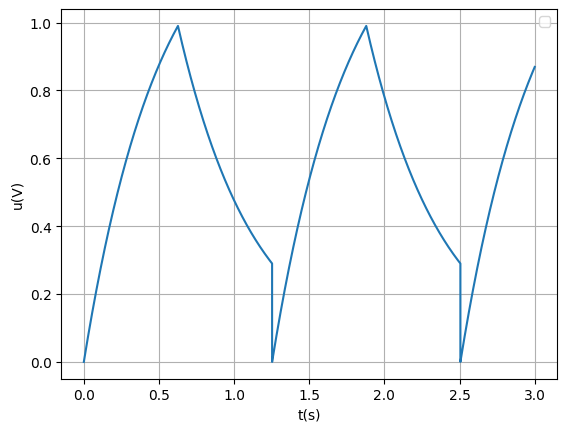

In [241]:
generate_u_c(u_s=1.4, u_c=0.99, R=510, C=1000)
print(y_u_c)
plt.plot(x_u_c, y_u_c)
plt.xlabel('t(s)')
plt.ylabel('u(V)')
plt.grid(True)
# plt.title('R=510$\Omega$,C=10$\mu$F')
plt.legend()
plt.show()
y_u_c.clear()

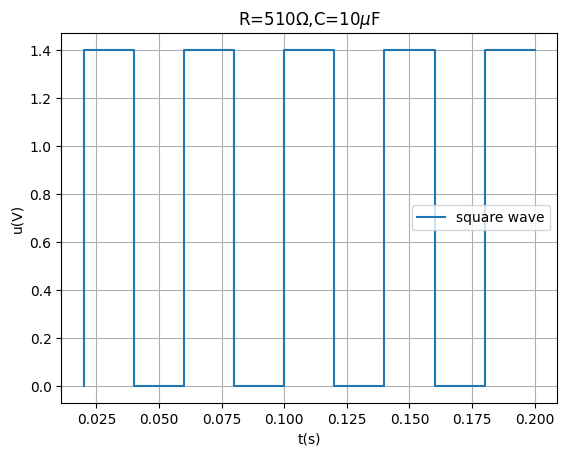

In [147]:
generate_square_wave(frequency=25, y_max=1.4, y_min=0, ratio=0.5)

plt.plot(T, y_square, drawstyle='steps-pre', label='square wave')
plt.xlabel('t(s)')
plt.ylabel('u(V)')
plt.grid(True)
plt.title('R=510$\Omega$,C=10$\mu$F')
plt.legend()
plt.show()

T.clear()
y_square.clear()
